In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
page = 1
url = f'https://www.carsome.id/en/buy-car?pageNo={page}'

cars_list = []


for page in range(1,9):
    html_page = requests.get(url).text
    soup = bs(html_page, 'html.parser')
    cars_cards = soup.find_all('div', class_ = 'list-card__item')
    for car in cars_cards:
        car_name = car.find('a', class_ = 'mod-b-card__title')
        if not car_name == None:
            car_name = car_name.text.strip()
        else:
            car_name = ""
        
        car_price = car.find('div', class_ = 'mod-card__price__total')
        if not car_price == None:
            car_price = car_price.text.strip()
        else:
            car_price = ""
        cars_list.append((car_name, car_price))
    page += 1  
df = pd.DataFrame(cars_list, columns = ['Car', 'Price'])
df.head()

,Car,Price
0,2018\n Mercedes-Benz\n \n ...,Rp\n 479.000.000
1,2019\n Toyota\n \n AGYA\n ...,Rp\n 111.000.000
2,2017\n Honda\n \n JAZZ\n ...,Rp\n 210.000.000
3,2021\n Honda\n \n HR-V\n ...,Rp\n 241.000.000
4,2018\n Honda\n \n BRIO\n ...,Rp\n 136.000.000


In [3]:
#Clean the data

# Clean Car and Price column
df['Car'] = df['Car'].str.replace('\n', ' ')
df['Price'] = df['Price'].str.replace('\n', ' ')

# Trim extra spaces
df['Car'] = df['Car'].str.replace(r'\s+', ' ', regex=True)
df['Car'] = df['Car'].str.strip()

# Create Year Column
df['Year'] = df['Car'].str[:4]
df['Car'] = df['Car'].str[5:]

# Clear empty rows
df = df[df['Year'] != ''].reset_index(drop=True)

# Create Merk Column
df['Brand'] = df['Car'].str.split(' ').str[0]

# change Year from string to integer
df['Year'] = df['Year'].astype(int)

In [4]:
# Check the data
df.head()

,Car,Price,Year,Brand
0,Mercedes-Benz GLA 200 AMG 1.6,Rp 479.000.000,2018,Mercedes-Benz
1,Toyota AGYA G 1.2,Rp 111.000.000,2019,Toyota
2,Honda JAZZ RS 1.5,Rp 210.000.000,2017,Honda
3,Honda HR-V S 1.5,Rp 241.000.000,2021,Honda
4,Honda BRIO SATYA E 1.2,Rp 136.000.000,2018,Honda


In [5]:
# Total row and column
df.shape

(144, 4)

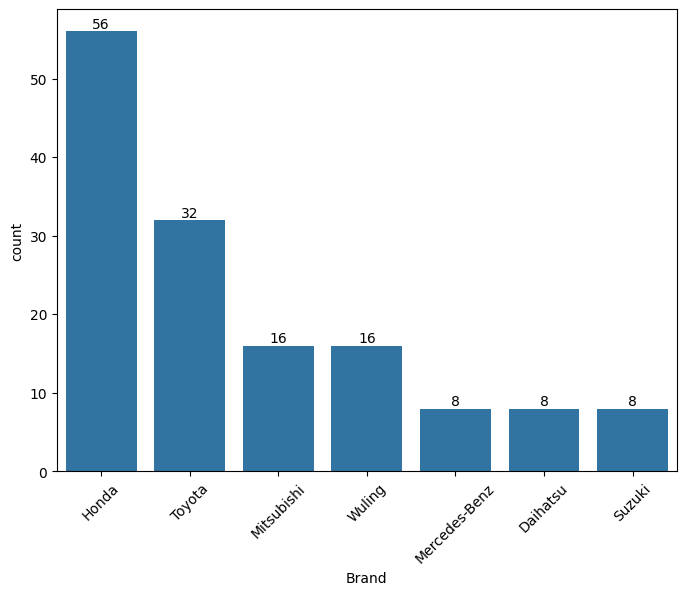

In [6]:
# Number of car per brand
plt.figure(figsize=(8, 6))
ax = sns.countplot(x =df['Brand'], data = df, order=df['Brand'].value_counts().index) 
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

In [7]:
# create csv file
df.to_csv('car.csv', encoding='utf-8')